## **Market Price Prediction**

#### The objective of this project is to build models that can accurately predict market prices by preprocessing the dataset, conducting exploratory data analysis, engineering relevant features, and evaluating various time series forecasting models to identify and fine-tune the best-performing one, ensuring reliable performance on unseen data.

#### **importing modules**

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

#### **importing file**

In [2]:
data = pd.read_csv("C:/Users/User/Downloads/MarketPricePrediction.csv")

#### **previewing data**

In [3]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012


In [4]:
# Convert 'Month-Year' to datetime with day set to 1st
data['date'] = pd.to_datetime(data['date'], format='%B-%Y')
data.set_index('date', inplace=True)

data.sort_index(inplace=True)


In [5]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [6]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2016-02-01,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR
2016-02-01,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE
2016-02-01,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA
2016-02-01,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA
2016-02-01,KOLKATA,February,2016,168020,1246,1368,1309,WB,KOLKATA


In [7]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city'],
      dtype='object')

In [8]:
data.shape

(10227, 9)

In [9]:
data.describe()

,year,quantity,priceMin,priceMax,priceMod
count,10227.000000,1.022700e+04,10227.000000,10227.000000,10227.000000
mean,2009.022294,7.660488e+04,646.944363,1212.760731,984.284345
std,4.372841,1.244087e+05,673.121850,979.658874,818.471498
min,1996.000000,2.000000e+01,16.000000,145.000000,80.000000
25%,2006.000000,8.898000e+03,209.000000,557.000000,448.000000
50%,2009.000000,2.746000e+04,440.000000,923.000000,747.000000
75%,2013.000000,8.835650e+04,828.000000,1527.000000,1248.000000
max,2016.000000,1.639032e+06,6000.000000,8192.000000,6400.000000


In [10]:
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
dtype: int64

### **Durbin Watson Test**

In [11]:
import statsmodels.api as sm
sm.stats.durbin_watson(data['priceMin'])

0.4784576415451055

In [12]:
sm.stats.durbin_watson(data['priceMax'])

0.08282274547461976

In [13]:
sm.stats.durbin_watson(data['priceMod'])

0.11940849464830226

In [14]:
sm.stats.durbin_watson(data['quantity'])

1.4271418621491259

### **Visualization**

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<Figure size 2000x1400 with 0 Axes>

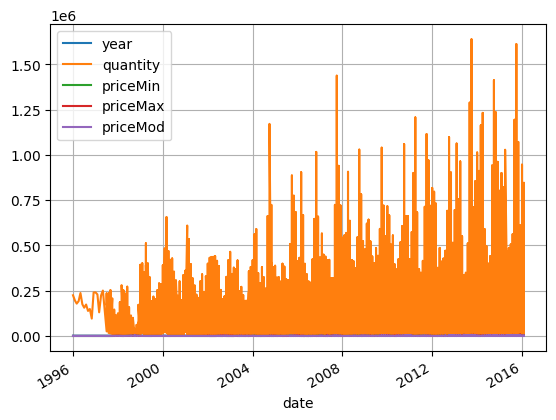

In [16]:
plt.figure(figsize=(20,14))
data.plot()
plt.grid()

<Axes: >

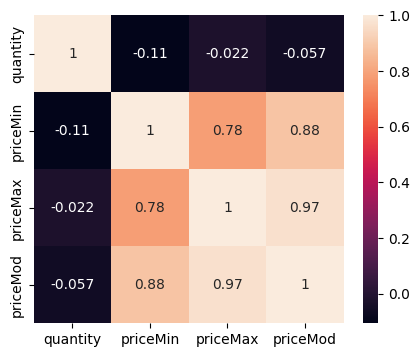

In [17]:
corr = data.drop(['market', 'month', 'year', 'state', 'city'], axis=1).corr()
fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(corr, annot=True, ax=ax)

In [18]:
data['city'].value_counts()

city
LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
SRIGANGANAGAR      1
MEERUT             1
CHALLAKERE         1
RAJAHMUNDRY        1
NEEMUCH            1
Name: count, Length: 117, dtype: int64

In [19]:
dataset = data[data['city'] == 'LASALGAON']

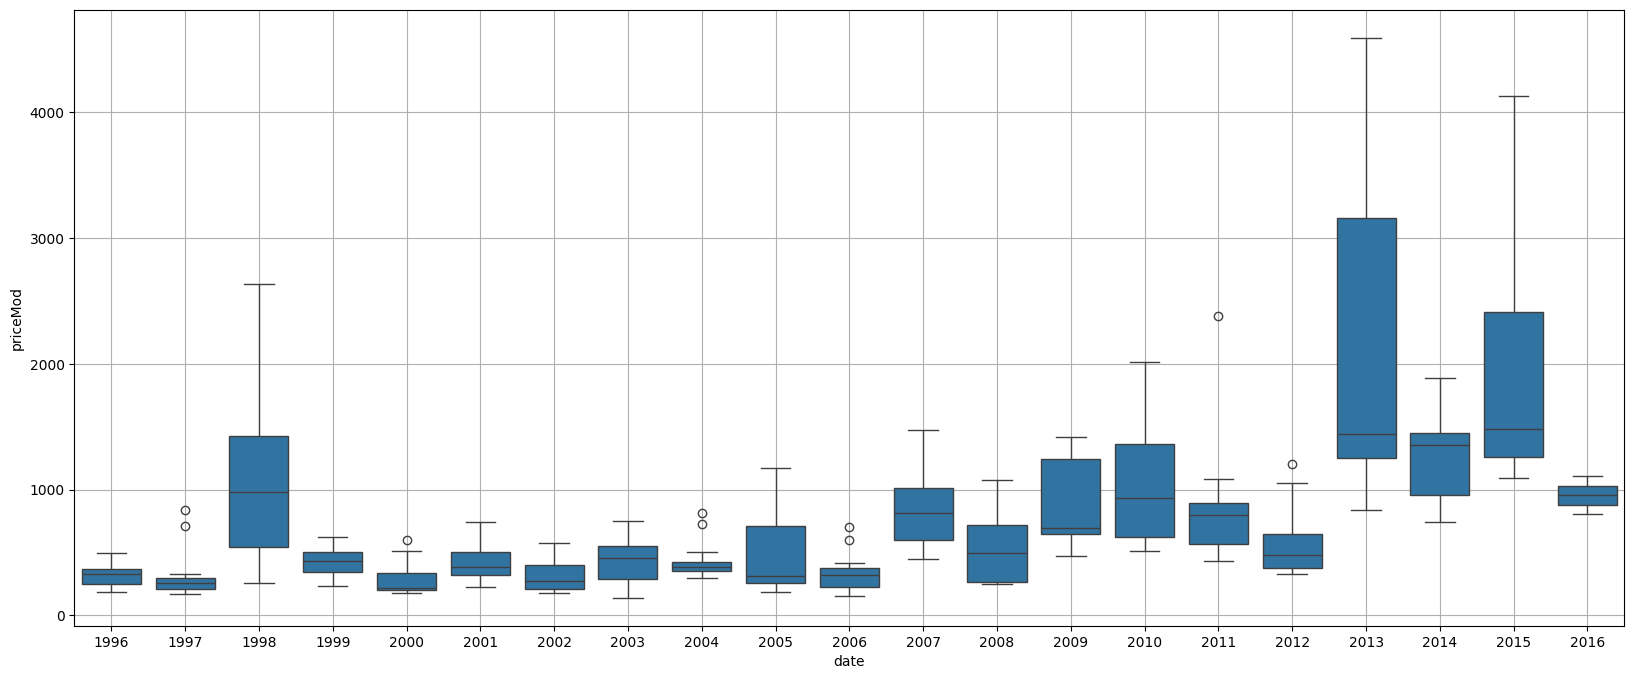

In [20]:
plt.figure(figsize=(20,8))
sns.boxplot(x = dataset.index.year, y = dataset['priceMod'])
plt.grid()

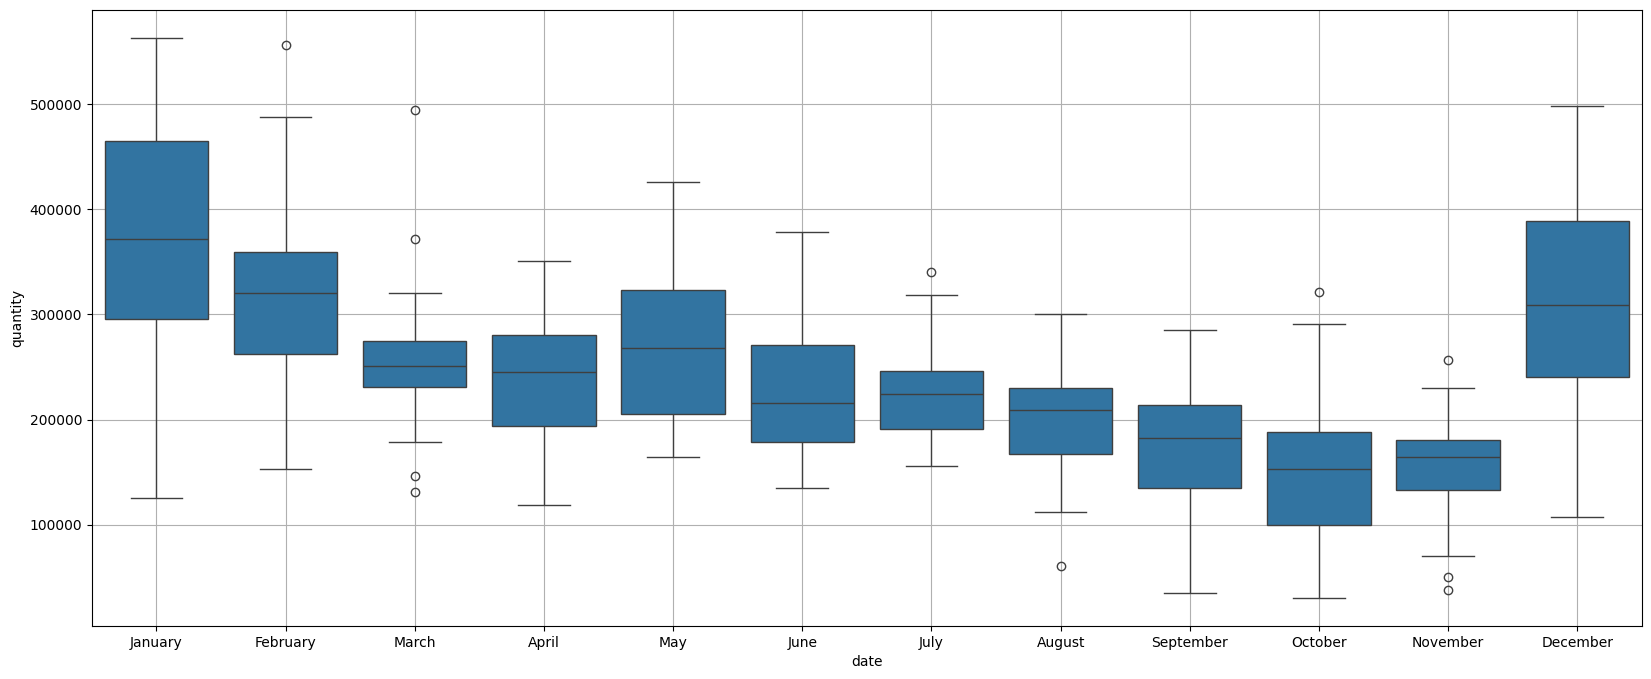

In [21]:
plt.figure(figsize=(20,8))
sns.boxplot(x = dataset.index.month_name(), y = dataset['quantity'])
plt.grid()

<Axes: xlabel='date'>

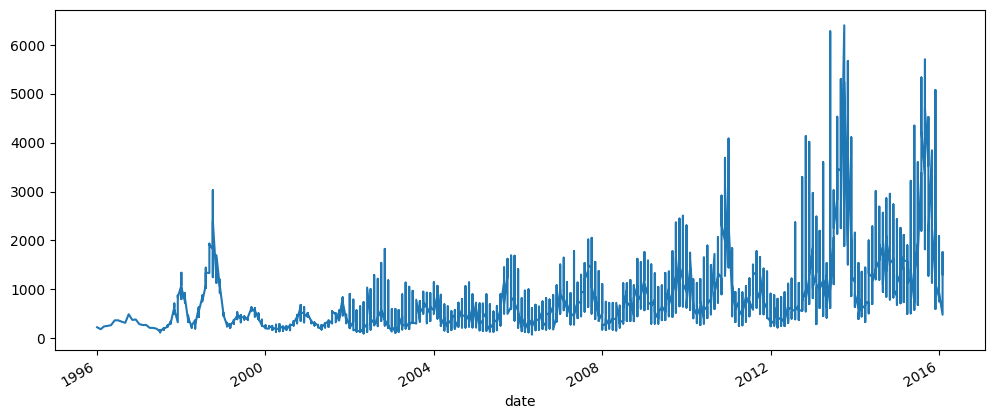

In [23]:
data['priceMod'].plot(figsize=(12, 5))

### **Seasonal Decomposition**

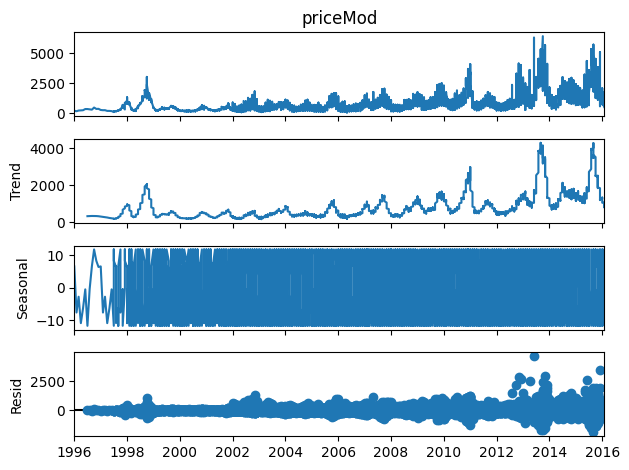

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data['priceMod'], model='additive', period=12)
fig = decomposition.plot()
plt.show()

In [25]:
print("Start Date :", data.index.min())
print("End Date :", data.index.max())

Start Date : 1996-01-01 00:00:00
End Date : 2016-02-01 00:00:00


In [26]:
train_data = data[data.index < pd.to_datetime('2015-12-01')]
train_data.shape

(9970, 9)

In [27]:
test_data = data[data.index >= pd.to_datetime('2015-12-01')]
test_data.shape

(257, 9)

In [28]:
train = train_data[['priceMod']]
test = test_data[['priceMod']]

### **Checking for Stationarity**

In [29]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(dataset):
    rolmean = dataset.rolling(window=7).mean()
    rolstd = dataset.rolling(window=7).std()

    orig = plt.plot(dataset, color='blue', label='Original')
    mean = plt.plot(rolmean, color='red', label='rolling mean')
    std = plt.plot(rolstd, color='black', label='rolling Std')

    plt.legend(loc='best')
    plt.title("Rolling Mean and Standard Deviation - Stationary or Not")
    plt.show(block=False)


    print("Results od Dickey Fuller Test: ")
    dftest = adfuller(dataset, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index=['ADF Test stats', 'P-Value', 'Num of Lags', 'Num of Observations'])
    for key, value in dftest[4].items():
        dfoutput['Critical Values (%s)'%key] = value
    print(dfoutput, '\n')

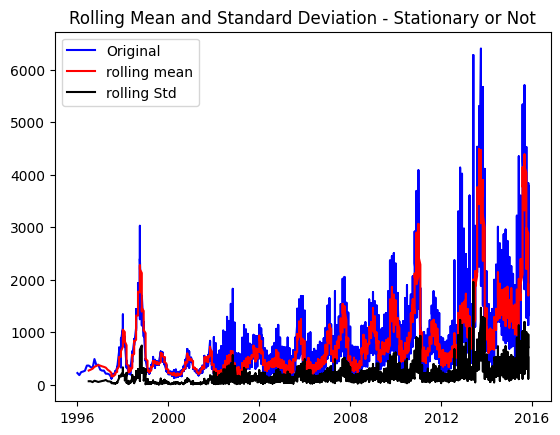

Results od Dickey Fuller Test: 
ADF Test stats             -3.053626
P-Value                     0.030181
Num of Lags                32.000000
Num of Observations      9937.000000
Critical Values (1%)       -3.431008
Critical Values (5%)       -2.861831
Critical Values (10%)      -2.566925
dtype: float64 



In [30]:
test_stationarity(train['priceMod'])

In [31]:
def check_adtest(dataset):
    result = adfuller(dataset)
    print("Augumented Dickey Fuller Test: To check whether data is stationary or Not")
    labels = ['ADF Test stats', 'P-Value', 'Number of Lags', 'No. of Observation']

    for i, j in zip(result, labels):
        print(j + " :--> " + str(i) )
    if result[1] <=0.05:
        print("STrong evidence against null hypothesis and my time series is stationary")
    else:
        print("weak evidence against null hypothesis and my time series is non-stationary")


In [32]:
check_adtest(train['priceMod'])

Augumented Dickey Fuller Test: To check whether data is stationary or Not
ADF Test stats :--> -3.0536260613550117
P-Value :--> 0.030180902959319113
Number of Lags :--> 32
No. of Observation :--> 9937
STrong evidence against null hypothesis and my time series is stationary


### **Time Series Forecasting using Arima**

In [33]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [34]:
dfobj = pd.DataFrame(columns=['Param', 'AIC'])
dfobj

,Param,AIC


In [37]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA

results = []

for param in pdq:
    mod = ARIMA(train['priceMod'], order=param)
    results_ARIMA = mod.fit()
    print("ARIMA{} - AIC:{}".format(param, results_ARIMA.aic))
    results.append({'param': param, 'AIC': results_ARIMA.aic})

# Create a DataFrame from the results
dfobj = pd.DataFrame(results)

print(dfobj)


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0) - AIC:162204.95866339945


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1) - AIC:156478.4132715572


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 0) - AIC:149581.05808965224


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 1, 1) - AIC:143828.76524681615


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 0) - AIC:148871.01892819774


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 0, 1) - AIC:143844.75430136465


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 0) - AIC:146387.4823982789


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(1, 1, 1) - AIC:143822.49702262788
       param            AIC
0  (0, 0, 0)  162204.958663
1  (0, 0, 1)  156478.413272
2  (0, 1, 0)  149581.058090
3  (0, 1, 1)  143828.765247
4  (1, 0, 0)  148871.018928
5  (1, 0, 1)  143844.754301
6  (1, 1, 0)  146387.482398
7  (1, 1, 1)  143822.497023


In [38]:
dfobj.sort_values(by=['AIC'])

,param,AIC
7,"(1, 1, 1)",143822.497023
3,"(0, 1, 1)",143828.765247
5,"(1, 0, 1)",143844.754301
6,"(1, 1, 0)",146387.482398
4,"(1, 0, 0)",148871.018928
2,"(0, 1, 0)",149581.058090
1,"(0, 0, 1)",156478.413272
0,"(0, 0, 0)",162204.958663


In [39]:
model = ARIMA(train['priceMod'], order=(1,1,1), enforce_stationarity=False, enforce_invertibility=False)
results_ARIMA = model.fit()
print(results_ARIMA.summary())

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                 9970
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -71894.508
Date:                Sun, 26 May 2024   AIC                         143795.016
Time:                        17:32:58   BIC                         143816.637
Sample:                             0   HQIC                        143802.336
                               - 9970                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0340      0.007     -5.062      0.000      -0.047      -0.021
ma.L1         -0.8504      0.003   -253.264      0.000      -0.857      -0.844
sigma2      1.079e+05    540.170    199.673      0.0

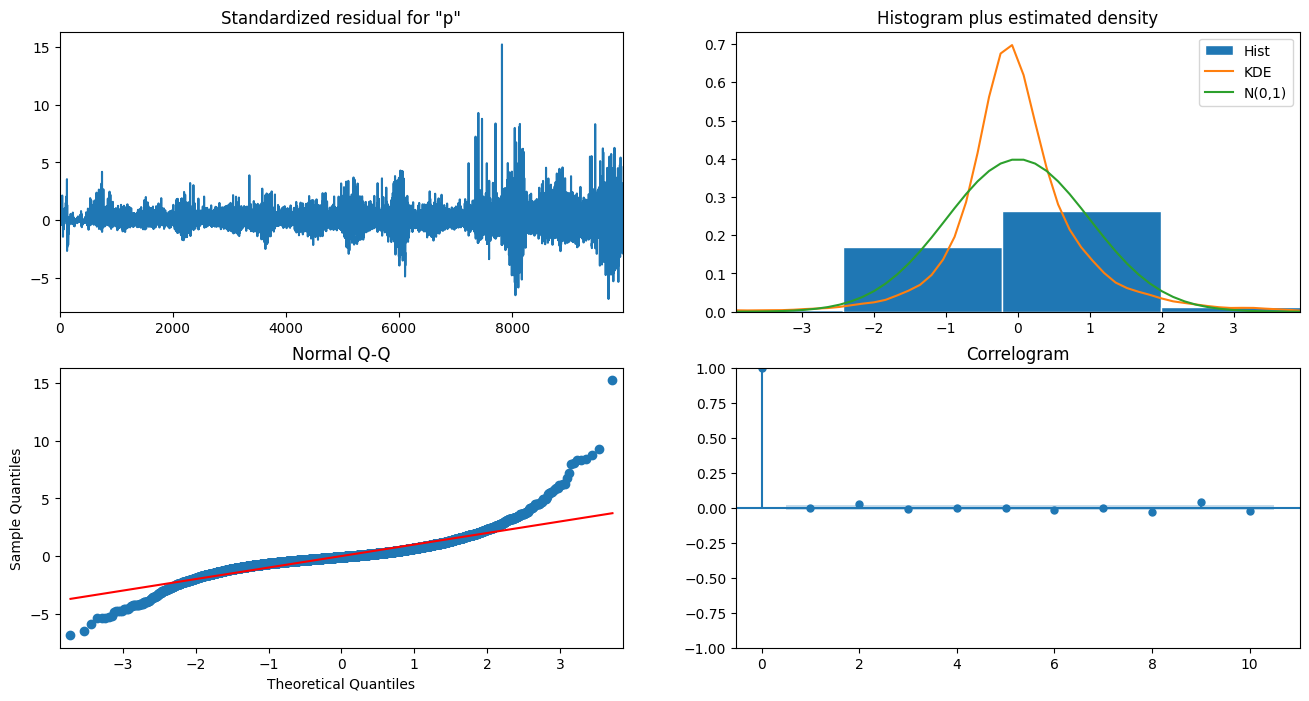

In [40]:
results_ARIMA.plot_diagnostics(figsize=(16, 8))
plt.show()

In [41]:
final_hat_avg = test.copy()
pred_ARIMA = results_ARIMA.get_forecast(steps=len(test))
pred_ARIMA.predicted_mean

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9970     1954.035433
9971     1932.736055
9972     1933.460716
9973     1933.436061
9974     1933.436900
            ...     
10222    1933.436873
10223    1933.436873
10224    1933.436873
10225    1933.436873
10226    1933.436873
Name: predicted_mean, Length: 257, dtype: float64

In [42]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(test.priceMod, pred_ARIMA.predicted_mean, squared=False))
print(rmse)

29.430076835537616


#### **Calculate MAPE**

In [43]:
def calculate_mape(actual, predicted):
    actual, predicted = np.array(actual), np.array(predicted)
    return np.mean(np.abs((actual - predicted) / actual)) * 100

In [44]:
mapel = calculate_mape(test.priceMod, pred_ARIMA.predicted_mean)
print("MAPE :", mapel)

MAPE : 81.33160317153934


In [45]:
resultDF = pd.DataFrame({'Test RMSE' : rmse}, index=['ARIMA(1, 1, 1)'])
resultDF

,Test RMSE
"ARIMA(1, 1, 1)",29.430077


### **Building SARIMA Model**

In [46]:
dfobj2 = pd.DataFrame(columns = ['Param', 'seasonal', 'AIC'])
dfobj2

,Param,seasonal,AIC


In [47]:
import statsmodels.api as sm

results = []

for param in pdq:
    for param_seasonal in seasonal_pdq:

        model = sm.tsa.statespace.SARIMAX(train['priceMod'], order=param, seasonal_order=param_seasonal)
        results_SARIMA = model.fit()
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        results.append({'param': param, 'seasonal': param_seasonal, 'AIC': results_SARIMA.aic})


dfobj2 = pd.DataFrame(results)
print(dfobj2)

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 0, 0, 12)7 - AIC:170963.04348694853


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 0, 1, 12)7 - AIC:162957.1628686703


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 0, 12)7 - AIC:150354.09689932098


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 1, 12)7 - AIC:147361.28042720017


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 0, 0, 12)7 - AIC:150237.09101595564


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 0, 1, 12)7 - AIC:147523.70129001932


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 0, 12)7 - AIC:148158.85464153305


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 1, 12)7 - AIC:147356.301674058


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 0, 12)7 - AIC:162875.56399783774


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 1, 12)7 - AIC:158678.60697620275


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 0, 12)7 - AIC:150302.2179488922


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 12)7 - AIC:147003.80565552943


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 0, 12)7 - AIC:150134.49507134143


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


SARIMA(0, 0, 1)x(1, 0, 1, 12)7 - AIC:147164.77633876784


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 0, 12)7 - AIC:148013.34781400271


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 12)7 - AIC:146998.2362582243


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:149581.05808965224


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:149582.46315945167


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 0, 12)7 - AIC:156371.79744330596


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 1, 12)7 - AIC:149491.04180157091


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:149582.42674482366


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:149575.62952860957


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 0, 12)7 - AIC:153491.84895271598


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 1, 12)7 - AIC:149492.51887952365


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:143828.76524681615


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:143830.76460256948


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 0, 12)7 - AIC:150351.66205368357


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 1, 12)7 - AIC:143744.52395009663


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:143830.76459468348


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:143832.76381902065


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 0, 12)7 - AIC:147645.3735913738


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 12)7 - AIC:143746.52260612271


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 0, 0, 12)7 - AIC:149303.09167303404


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 0, 1, 12)7 - AIC:149300.56544197086


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 0, 12)7 - AIC:150287.4147029362


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 1, 12)7 - AIC:146786.52585616423


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 0, 12)7 - AIC:149300.31350228167


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 1, 12)7 - AIC:146941.85558550007


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 0, 12)7 - AIC:147960.35119448457


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 12)7 - AIC:146781.5768847985


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 0, 0, 12)7 - AIC:143848.2097722069


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 0, 1, 12)7 - AIC:143850.20889093608


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 0, 12)7 - AIC:150051.29624590033


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 1, 12)7 - AIC:143752.2513098995


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 0, 12)7 - AIC:143850.20900753333


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 12)7 - AIC:143844.8965537056


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 0, 12)7 - AIC:147368.8844479065


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 1, 12)7 - AIC:143754.5167464411


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 0, 12)7 - AIC:146387.4823982789


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 0, 1, 12)7 - AIC:146389.13855491934


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 0, 12)7 - AIC:153041.52086188982


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 1, 12)7 - AIC:146301.00632830823


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 0, 12)7 - AIC:146389.13549854473


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12)7 - AIC:146391.11923793922


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 12)7 - AIC:150189.80853903978


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12)7 - AIC:146302.56337804048


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 0, 12)7 - AIC:143822.49702262788


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 0, 1, 12)7 - AIC:143824.48326635704


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 12)7 - AIC:150284.06914141215


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12)7 - AIC:143738.07643152983


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 0, 12)7 - AIC:143824.4830994573


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 12)7 - AIC:143826.4952698953


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12)7 - AIC:147642.69764364802


C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12)7 - AIC:143740.073065403
        param       seasonal            AIC
0   (0, 0, 0)  (0, 0, 0, 12)  170963.043487
1   (0, 0, 0)  (0, 0, 1, 12)  162957.162869
2   (0, 0, 0)  (0, 1, 0, 12)  150354.096899
3   (0, 0, 0)  (0, 1, 1, 12)  147361.280427
4   (0, 0, 0)  (1, 0, 0, 12)  150237.091016
..        ...            ...            ...
59  (1, 1, 1)  (0, 1, 1, 12)  143738.076432
60  (1, 1, 1)  (1, 0, 0, 12)  143824.483099
61  (1, 1, 1)  (1, 0, 1, 12)  143826.495270
62  (1, 1, 1)  (1, 1, 0, 12)  147642.697644
63  (1, 1, 1)  (1, 1, 1, 12)  143740.073065

[64 rows x 3 columns]


In [48]:
dfobj2.sort_values(by=['AIC'])

,param,seasonal,AIC
59,"(1, 1, 1)","(0, 1, 1, 12)",143738.076432
63,"(1, 1, 1)","(1, 1, 1, 12)",143740.073065
27,"(0, 1, 1)","(0, 1, 1, 12)",143744.523950
31,"(0, 1, 1)","(1, 1, 1, 12)",143746.522606
43,"(1, 0, 1)","(0, 1, 1, 12)",143752.251310
...,...,...,...
18,"(0, 1, 0)","(0, 1, 0, 12)",156371.797443
9,"(0, 0, 1)","(0, 0, 1, 12)",158678.606976
8,"(0, 0, 1)","(0, 0, 0, 12)",162875.563998
1,"(0, 0, 0)","(0, 0, 1, 12)",162957.162869


In [49]:
model_sarima = sm.tsa.statespace.SARIMAX(train['priceMod'], order=(1, 1, 1), seasonal_order=(0, 1, 1, 12), enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = model_sarima.fit()
print(results_SARIMA.summary())

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           priceMod   No. Observations:                 9970
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood              -71766.168
Date:                            Sun, 26 May 2024   AIC                         143540.336
Time:                                    18:03:20   BIC                         143569.154
Sample:                                         0   HQIC                        143550.093
                                           - 9970                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0344      0.007     -5.096      0.000      -0.048      -0.021
ma.L1         -0.8504      0.003   

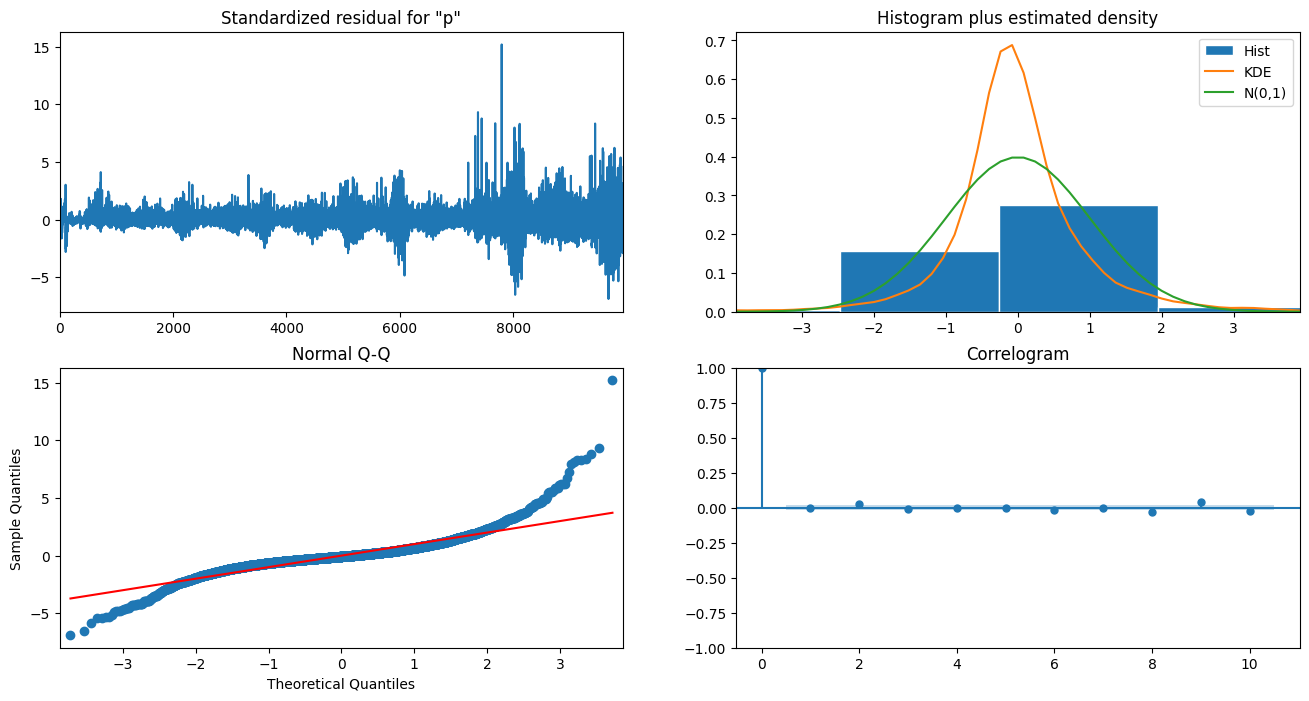

In [50]:
results_SARIMA.plot_diagnostics(figsize = (16, 8))
plt.show()

In [51]:
final_hat_avg = test.copy()
pred_SARIMA = results_SARIMA.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

C:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


9970     1958.566706
9971     1941.386667
9972     1940.740526
9973     1927.624356
9974     1930.662855
            ...     
10222    1979.174893
10223    1983.869774
10224    1982.472022
10225    1969.381677
10226    1972.419289
Name: predicted_mean, Length: 257, dtype: float64

In [52]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse1 = sqrt(mean_squared_error(test.priceMod, pred_SARIMA.predicted_mean, squared=False))
print(rmse1)

29.787183398766437


In [53]:
mape2 = calculate_mape(test.priceMod, pred_SARIMA.predicted_mean)
print("MAPE :", mape2)

MAPE : 83.46676748356195


In [54]:
resultDF1 = pd.DataFrame({'Test MAPE' : mapel}, index=['ARIMA(1, 1, 1)'])

resultDF2 = pd.DataFrame({'Test MAPE' : mape2}, index=['SARIMA(1, 1, 1)(0, 1, 1, 12)'])
resultDf_final = pd.concat([resultDF1, resultDF2])
resultDf_final

,Test MAPE
"ARIMA(1, 1, 1)",81.331603
"SARIMA(1, 1, 1)(0, 1, 1, 12)",83.466767


### **Prophet Time Series**

In [82]:
import prophet

In [56]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [57]:
data.tail()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2016-02-01,RAIPUR(CHGARH),February,2016,4300,950,1142,1077,HR,RAIPUR
2016-02-01,INDORE(MP),February,2016,97178,104,856,575,MP,INDORE
2016-02-01,YEOLA(MS),February,2016,272527,347,984,730,MS,YEOLA
2016-02-01,SATANA(MS),February,2016,90142,281,1130,806,MS,SATANA
2016-02-01,KOLKATA,February,2016,168020,1246,1368,1309,WB,KOLKATA


In [58]:
data.shape

(10227, 9)

In [59]:
data.columns

Index(['market', 'month', 'year', 'quantity', 'priceMin', 'priceMax',
       'priceMod', 'state', 'city'],
      dtype='object')

In [60]:
total = data.reset_index()

In [61]:
total = total[['date', 'priceMin', 'priceMax', 'priceMod', 'quantity']]

In [62]:
total.head()

,date,priceMin,priceMax,priceMod,quantity
0,1996-01-01,160,257,226,225063
1,1996-02-01,133,229,186,196164
2,1996-03-01,155,274,243,178992
3,1996-04-01,136,279,254,192592
4,1996-05-01,154,312,269,237574


In [63]:
df_prophet = total.rename(columns={'date':'ds', 'priceMod':'y'})

In [64]:
df_prophet

,ds,priceMin,priceMax,y,quantity
0,1996-01-01,160,257,226,225063
1,1996-02-01,133,229,186,196164
2,1996-03-01,155,274,243,178992
3,1996-04-01,136,279,254,192592
4,1996-05-01,154,312,269,237574
...,...,...,...,...,...
10222,2016-02-01,950,1142,1077,4300
10223,2016-02-01,104,856,575,97178
10224,2016-02-01,347,984,730,272527
10225,2016-02-01,281,1130,806,90142


In [65]:
from prophet import Prophet

In [66]:
m = Prophet()
model = m.fit(df_prophet)

18:04:55 - cmdstanpy - INFO - Chain [1] start processing
18:05:32 - cmdstanpy - INFO - Chain [1] done processing


In [67]:
model.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [68]:
future_global = model.make_future_dataframe(periods=100, freq='M')

In [69]:
future_global.tail(20)

,ds
322,2022-10-31
323,2022-11-30
324,2022-12-31
325,2023-01-31
326,2023-02-28
327,2023-03-31
328,2023-04-30
329,2023-05-31
330,2023-06-30
331,2023-07-31


In [70]:
len(future_global)

342

In [71]:
prediction = model.predict(future_global)

In [72]:
prediction.head(2)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,696.793600,-43.596712,1413.081709,696.793600,696.793600,-25.484209,-25.484209,-25.484209,-25.484209,-25.484209,-25.484209,0.0,0.0,0.0,671.309391
1,1996-02-01,692.330547,-134.855639,1225.212343,692.330547,692.330547,-169.054183,-169.054183,-169.054183,-169.054183,-169.054183,-169.054183,0.0,0.0,0.0,523.276363


In [73]:
prediction.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [74]:
prediction[['ds','yhat_lower','yhat_upper','yhat']].tail(20)

,ds,yhat_lower,yhat_upper,yhat
322,2022-10-31,-1479.112502,5104.445812,1862.954604
323,2022-11-30,-1426.206240,5089.897346,1846.205025
324,2022-12-31,-1352.272719,5250.090025,1946.378454
325,2023-01-31,-1493.641170,5108.307538,1883.059874
326,2023-02-28,-1278.620517,5671.337422,2067.904914
327,2023-03-31,-1823.338556,5187.559245,1603.133324
328,2023-04-30,-2179.992832,4883.941023,1414.956355
329,2023-05-31,-1984.043934,5153.827103,1413.193072
330,2023-06-30,-2096.776201,5199.694429,1557.980004
331,2023-07-31,-1021.246705,6445.667561,2627.745177


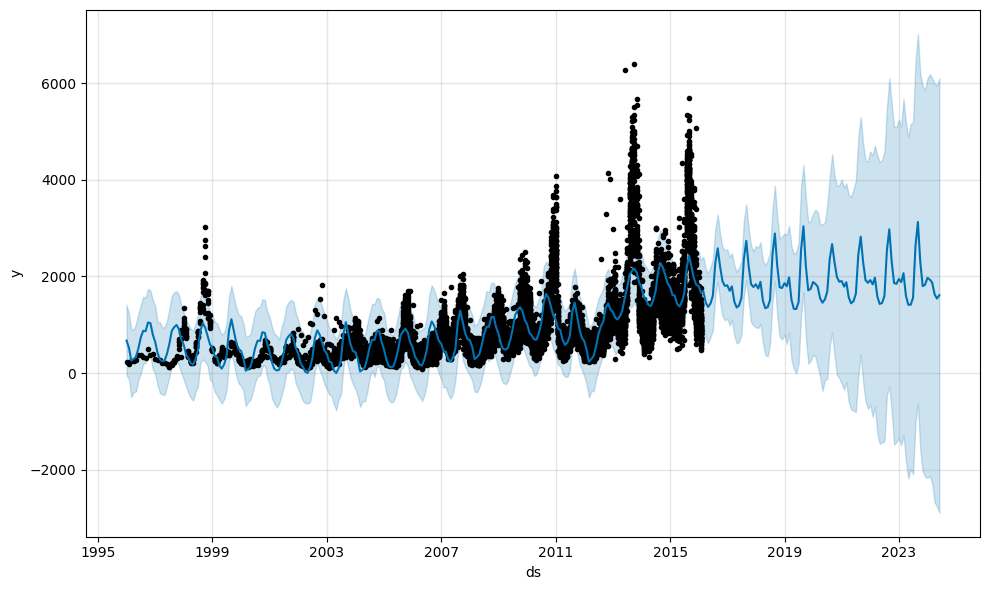

In [75]:
plt.figsize=(12, 5)
model.plot(prediction)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

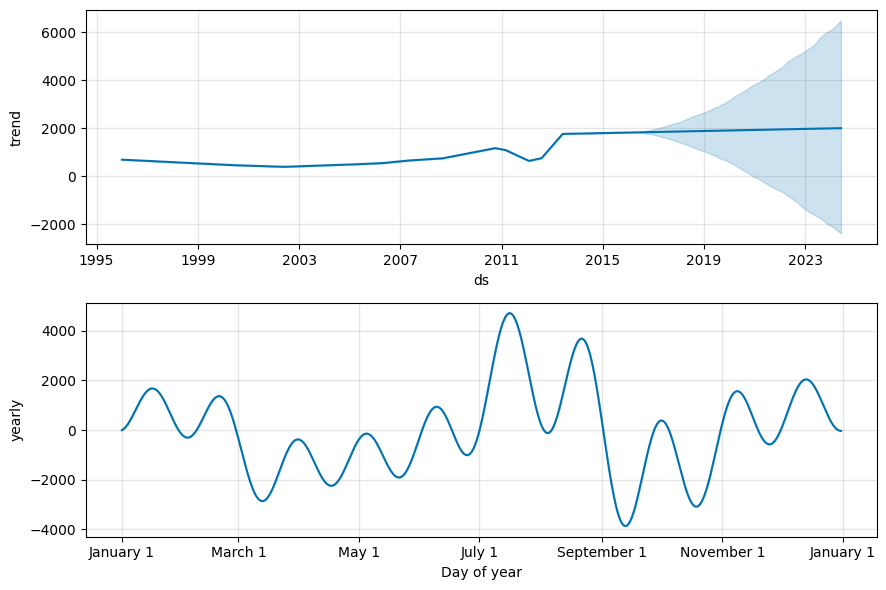

In [76]:
model.plot_components(prediction)
plt.show

In [77]:
from prophet.diagnostics import cross_validation
df_cv = cross_validation(model, horizon='30 days', period ='15 days', initial='30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/468 [00:00<?, ?it/s]

18:06:33 - cmdstanpy - INFO - Chain [1] start processing
18:06:34 - cmdstanpy - INFO - Chain [1] done processing
18:06:35 - cmdstanpy - INFO - Chain [1] start processing
18:06:35 - cmdstanpy - INFO - Chain [1] done processing
18:06:36 - cmdstanpy - INFO - Chain [1] start processing
18:06:36 - cmdstanpy - INFO - Chain [1] done processing
18:06:37 - cmdstanpy - INFO - Chain [1] start processing
18:06:37 - cmdstanpy - INFO - Chain [1] done processing
18:06:38 - cmdstanpy - INFO - Chain [1] start processing
18:06:39 - cmdstanpy - INFO - Chain [1] done processing
18:06:39 - cmdstanpy - INFO - Chain [1] start processing
18:06:41 - cmdstanpy - INFO - Chain [1] done processing
18:06:42 - cmdstanpy - INFO - Chain [1] start processing
18:06:43 - cmdstanpy - INFO - Chain [1] done processing
18:06:44 - cmdstanpy - INFO - Chain [1] start processing
18:06:45 - cmdstanpy - INFO - Chain [1] done processing
18:06:45 - cmdstanpy - INFO - Chain [1] start processing
18:06:46 - cmdstanpy - INFO - Chain [1]

In [78]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1996-03-01,-87.366646,-87.366648,-87.366644,243,1996-02-01
1,1996-03-01,-87.366646,-87.366648,-87.366644,243,1996-02-16
2,1996-04-01,-946.279184,-946.279185,-946.279184,254,1996-03-02
3,1996-04-01,-946.279184,-946.279185,-946.279184,254,1996-03-17
4,1996-05-01,-2044.515071,-2044.515072,-2044.515070,269,1996-04-01
...,...,...,...,...,...,...
20079,2016-02-01,1953.478209,1277.918956,2601.011564,887,2016-01-02
20080,2016-02-01,1953.478209,1233.889178,2606.547303,688,2016-01-02
20081,2016-02-01,1953.478209,1258.519833,2660.167204,586,2016-01-02
20082,2016-02-01,1953.478209,1279.847557,2633.750768,1450,2016-01-02


In [79]:
from prophet.diagnostics import performance_metrics

In [80]:
df_performance = performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,3 days,866471.370761,930.844440,622.590537,0.771324,0.523160,0.575364,0.467668
1,4 days,800115.350230,894.491671,629.209313,0.801086,0.543096,0.579351,0.445784
2,5 days,620278.513479,787.577624,566.701985,0.797032,0.517910,0.564683,0.459953
3,6 days,455926.370745,675.223201,484.032806,0.737189,0.453072,0.532157,0.500607
4,7 days,361106.492714,600.921370,440.264314,0.702408,0.477090,0.531618,0.504220
5,8 days,263787.196362,513.602177,394.559615,0.651208,0.473620,0.497508,0.552261
6,9 days,241465.649524,491.391544,370.184749,0.554833,0.421367,0.435188,0.624196
7,10 days,193569.561114,439.965409,322.075739,0.452595,0.305970,0.377388,0.706139
8,11 days,347701.380736,589.662090,372.215743,0.410747,0.342196,0.417437,0.655841
9,12 days,589237.400447,767.618004,478.496278,0.420576,0.367925,0.458395,0.571248


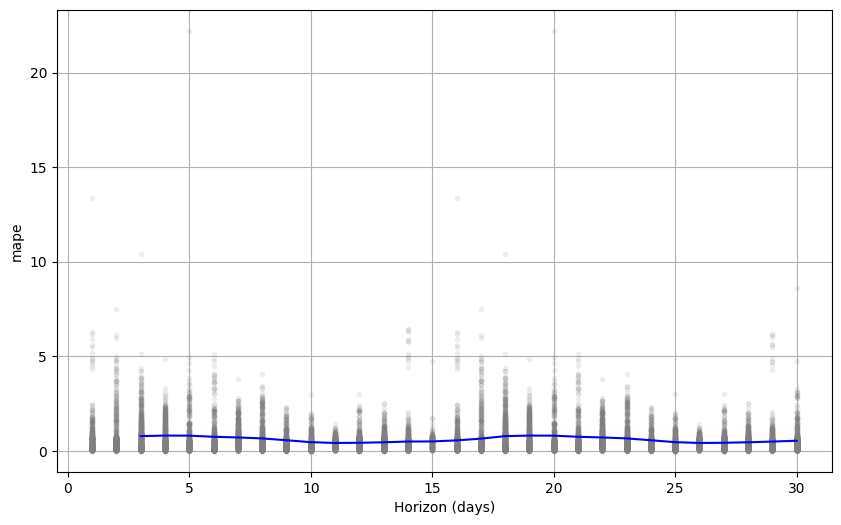

In [81]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv, metric='mape')
plt.show()

### **LSTM Time series forecasting**

In [11]:
data.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON


In [12]:
new_data = data[['priceMod']]

In [13]:
new_data.head()

,priceMod
date,
1996-01-01,226
1996-02-01,186
1996-03-01,243
1996-04-01,254
1996-05-01,269


In [14]:
new_data.tail()

,priceMod
date,
2016-02-01,1077
2016-02-01,575
2016-02-01,730
2016-02-01,806
2016-02-01,1309


In [15]:
start_date = new_data.index.min()
end_date = new_data.index.max()
print("Start Date :", start_date)
print("End Date :", end_date)

Start Date : 1996-01-01 00:00:00
End Date : 2016-02-01 00:00:00


<Axes: xlabel='date'>

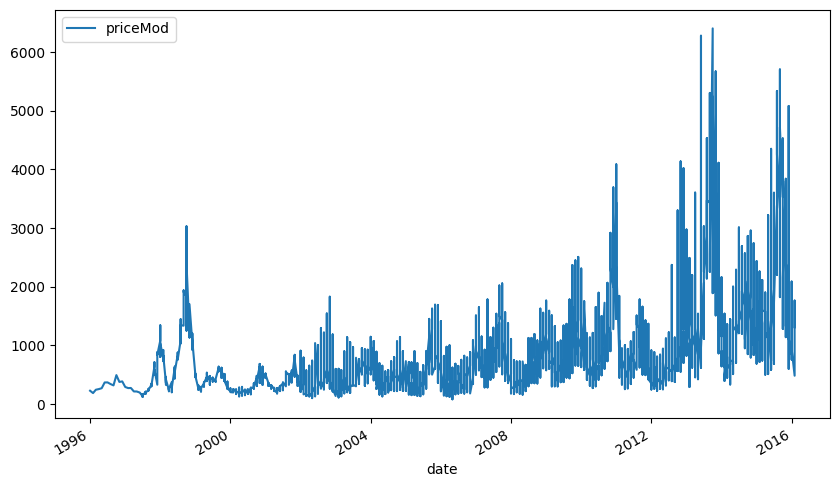

In [16]:
new_data.plot(figsize=(10,6))

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

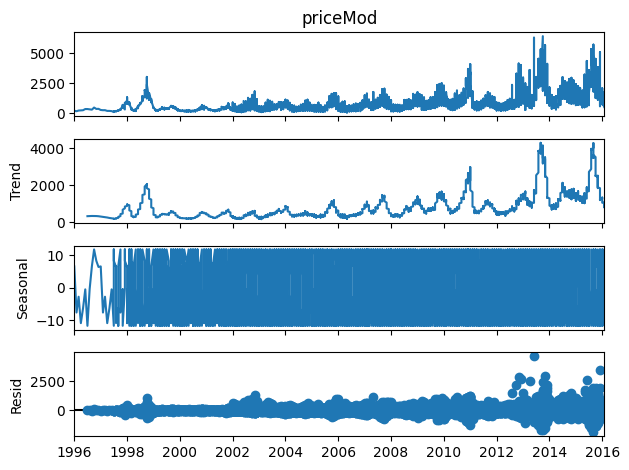

In [18]:
results = seasonal_decompose(new_data['priceMod'], model='additive', period=12)
results.plot()
plt.show()

In [19]:
len(new_data)

10227

In [20]:
train = new_data.iloc[:9204]
test = new_data.iloc[9204:]

In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [22]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [23]:
scaled_train[:10]

array([[0.02310127],
       [0.01677215],
       [0.02579114],
       [0.02753165],
       [0.02990506],
       [0.04541139],
       [0.04556962],
       [0.04113924],
       [0.0375    ],
       [0.06518987]])

In [24]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [25]:
n_input = 3
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size=1)

In [26]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict the y: \n{y}')

Given the Array: 
[0.02310127 0.01677215 0.02579114]
Predict the y: 
[[0.02753165]]


In [27]:
X.shape

(1, 3, 1)

In [28]:
n_input = 12
generator = TimeseriesGenerator(scaled_train, scaled_train, length = n_input, batch_size=1)

In [29]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [30]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40901 (159.77 KB)
Trainable params: 40901 (159.77 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.fit(generator,epochs=10)

Epoch 1/10
9192/9192 [==============================] - 129s 14ms/step - loss: 0.0023
Epoch 2/10
9192/9192 [==============================] - 84s 9ms/step - loss: 0.0023
Epoch 3/10
9192/9192 [==============================] - 84s 9ms/step - loss: 0.0023
Epoch 4/10
9192/9192 [==============================] - 84s 9ms/step - loss: 0.0023
Epoch 5/10
9192/9192 [==============================] - 82s 9ms/step - loss: 0.0023
Epoch 6/10
9192/9192 [==============================] - 83s 9ms/step - loss: 0.0023
Epoch 7/10
9192/9192 [==============================] - 84s 9ms/step - loss: 0.0023
Epoch 8/10
9192/9192 [==============================] - 85s 9ms/step - loss: 0.0023
Epoch 9/10
9192/9192 [==============================] - 84s 9ms/step - loss: 0.0023
Epoch 10/10
9192/9192 [==============================] - 85s 9ms/step - loss: 0.0023


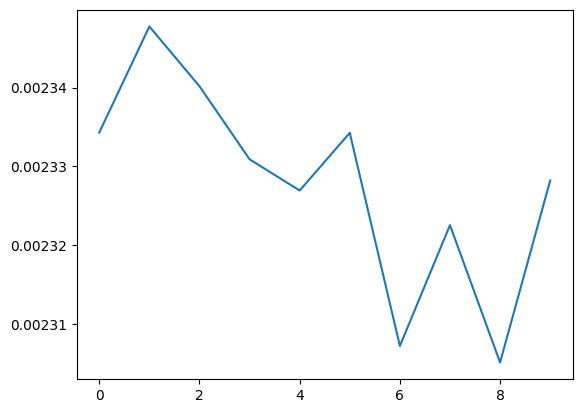

In [34]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [35]:
last_train_batch = scaled_train[-12:]

In [36]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [37]:
model.predict(last_train_batch)

1/1 [==============================] - 0s 241ms/step


array([[0.1746372]], dtype=float32)

In [38]:
scaled_test[0]

array([0.20506329])

In [39]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [41]:
test_predictions

[array([0.1746372], dtype=float32),
 array([0.17371762], dtype=float32),
 array([0.17183122], dtype=float32),
 array([0.17054236], dtype=float32),
 array([0.17004547], dtype=float32),
 array([0.17063059], dtype=float32),
 array([0.17307004], dtype=float32),
 array([0.17366427], dtype=float32),
 array([0.1755546], dtype=float32),
 array([0.17451166], dtype=float32),
 array([0.1742055], dtype=float32),
 array([0.17534958], dtype=float32),
 array([0.1789656], dtype=float32),
 array([0.1796076], dtype=float32),
 array([0.1802604], dtype=float32),
 array([0.1811572], dtype=float32),
 array([0.18216094], dtype=float32),
 array([0.18328583], dtype=float32),
 array([0.18430212], dtype=float32),
 array([0.18517064], dtype=float32),
 array([0.18608496], dtype=float32),
 array([0.18716186], dtype=float32),
 array([0.18833649], dtype=float32),
 array([0.18953155], dtype=float32),
 array([0.19069974], dtype=float32),
 array([0.1917576], dtype=float32),
 array([0.19285172], dtype=float32),
 array([0

In [40]:
test.head()

,priceMod
date,
2015-03-01,1376
2015-03-01,992
2015-03-01,1022
2015-03-01,1488
2015-03-01,740


In [42]:
true_predictions = scaler.inverse_transform(test_predictions)

In [55]:
test['Predictions'] = true_predictions

<Axes: xlabel='date'>

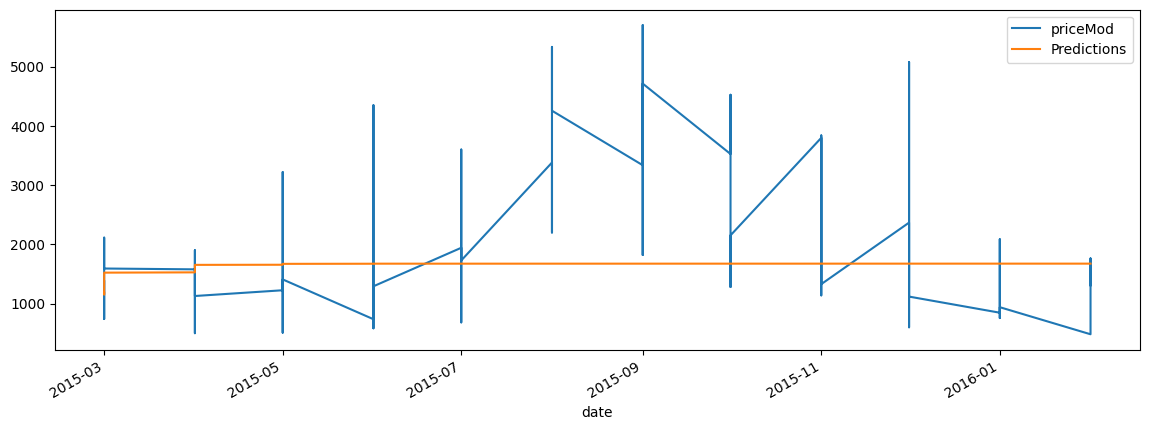

In [44]:
test.plot(figsize=(14,5))

In [47]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test['priceMod'], test['Predictions']))
print(rmse)

1138.7574054030474


In [48]:
def calculate_mape(actual, predicted):
  actual, predicted = np.array(actual), np.array(predicted)
  return np.mean(np.abs((actual - predicted) / actual))*100

In [49]:
mape4 = calculate_mape(test.priceMod, test.Predictions)
print("MAPE: ", mape4)

MAPE:  42.46757669833048


In [53]:
resultDf4 = pd.DataFrame({'Test MAPE': [mape4]}, index=['LSTM'])
print(resultDf4)

      Test MAPE
LSTM  42.467577


### **Conclusion**

#### In this project, we successfully developed robust models to predict market prices. The process involved several key steps, including data preprocessing, exploratory data analysis, feature engineering, model selection, training, and evaluation.